In [36]:
# Import pandas and numpy libraries

import pandas as pd
import numpy as np

In [37]:
# Read the train data

train_df = pd.read_csv('Ames_train.csv')
train_df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,527402250,20,RL,NaN,12537,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,149900
1,923225240,160,RM,41.0,2665,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,127000
2,534178010,20,RL,80.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,COD,Normal,127000
3,905452160,20,RL,75.0,9525,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,128000
4,535376100,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,108480


In [38]:
# For the example codes, I will only use 
# 4 variables and the target price
train_df = train_df[['Gr Liv Area',
                     'Garage Area',
                     'Year Built',
                     'Garage Finish',
                     'SalePrice']]

train_df.head()

,Gr Liv Area,Garage Area,Year Built,Garage Finish,SalePrice
0,1078,500.0,1971,Fin,149900
1,1475,336.0,1977,RFn,127000
2,1052,311.0,1963,Fin,127000
3,1172,366.0,1954,Fin,128000
4,1073,326.0,1921,Unf,108480


In [39]:
from sklearn.preprocessing import OneHotEncoder

# We define our One Hot Encoder
ohe = OneHotEncoder(categories='auto', handle_unknown='ignore')

# We can use here a list of one or more categorical variables to convert into numerical
categorical_features = ['Garage Finish']

# We apply the encoding to our train dataset
feature_arr = ohe.fit_transform(train_df[categorical_features]).toarray()

# We also store the names of the categories for the new column names
feature_labels = ohe.categories_

# We apply the new feature names
features = pd.DataFrame(feature_arr, columns=ohe.get_feature_names_out())

# And then combine with the rest of the numerical variables
train_df = pd.concat([train_df, features], axis=1).drop(columns=categorical_features, 
                                                        axis=1)

train_df.head()

,Gr Liv Area,Garage Area,Year Built,SalePrice,Garage Finish_Fin,Garage Finish_RFn,Garage Finish_Unf,Garage Finish_nan
0,1078,500.0,1971,149900,1.0,0.0,0.0,0.0
1,1475,336.0,1977,127000,0.0,1.0,0.0,0.0
2,1052,311.0,1963,127000,1.0,0.0,0.0,0.0
3,1172,366.0,1954,128000,1.0,0.0,0.0,0.0
4,1073,326.0,1921,108480,0.0,0.0,1.0,0.0


In [40]:
# Now, I'll keep just my 4 variables (they are 7 now after OHE)
# We will use the standard naming of:
# - X for the dataframe including all the input variables
# - y for the target 1-column dataframe

X_train = train_df.drop(columns=['SalePrice']).fillna(0)             
    
y_train = train_df[['SalePrice']]

# We print the shape to get a better idea of the number 
# of rows and columns that we got

X_train.shape, y_train.shape

((2344, 7), (2344, 1))

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# We use the Decision Tree Regreson on scikit-learn
# Remember to use random_state parameters as random 
# number seed, so your results are replicable

tree_reg = DecisionTreeRegressor(
    random_state=42, 
    min_samples_leaf=1, 
    max_depth=100)

# We can train our Tree with the "fit" function, 
# our input variables, and the target
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=100, random_state=42)

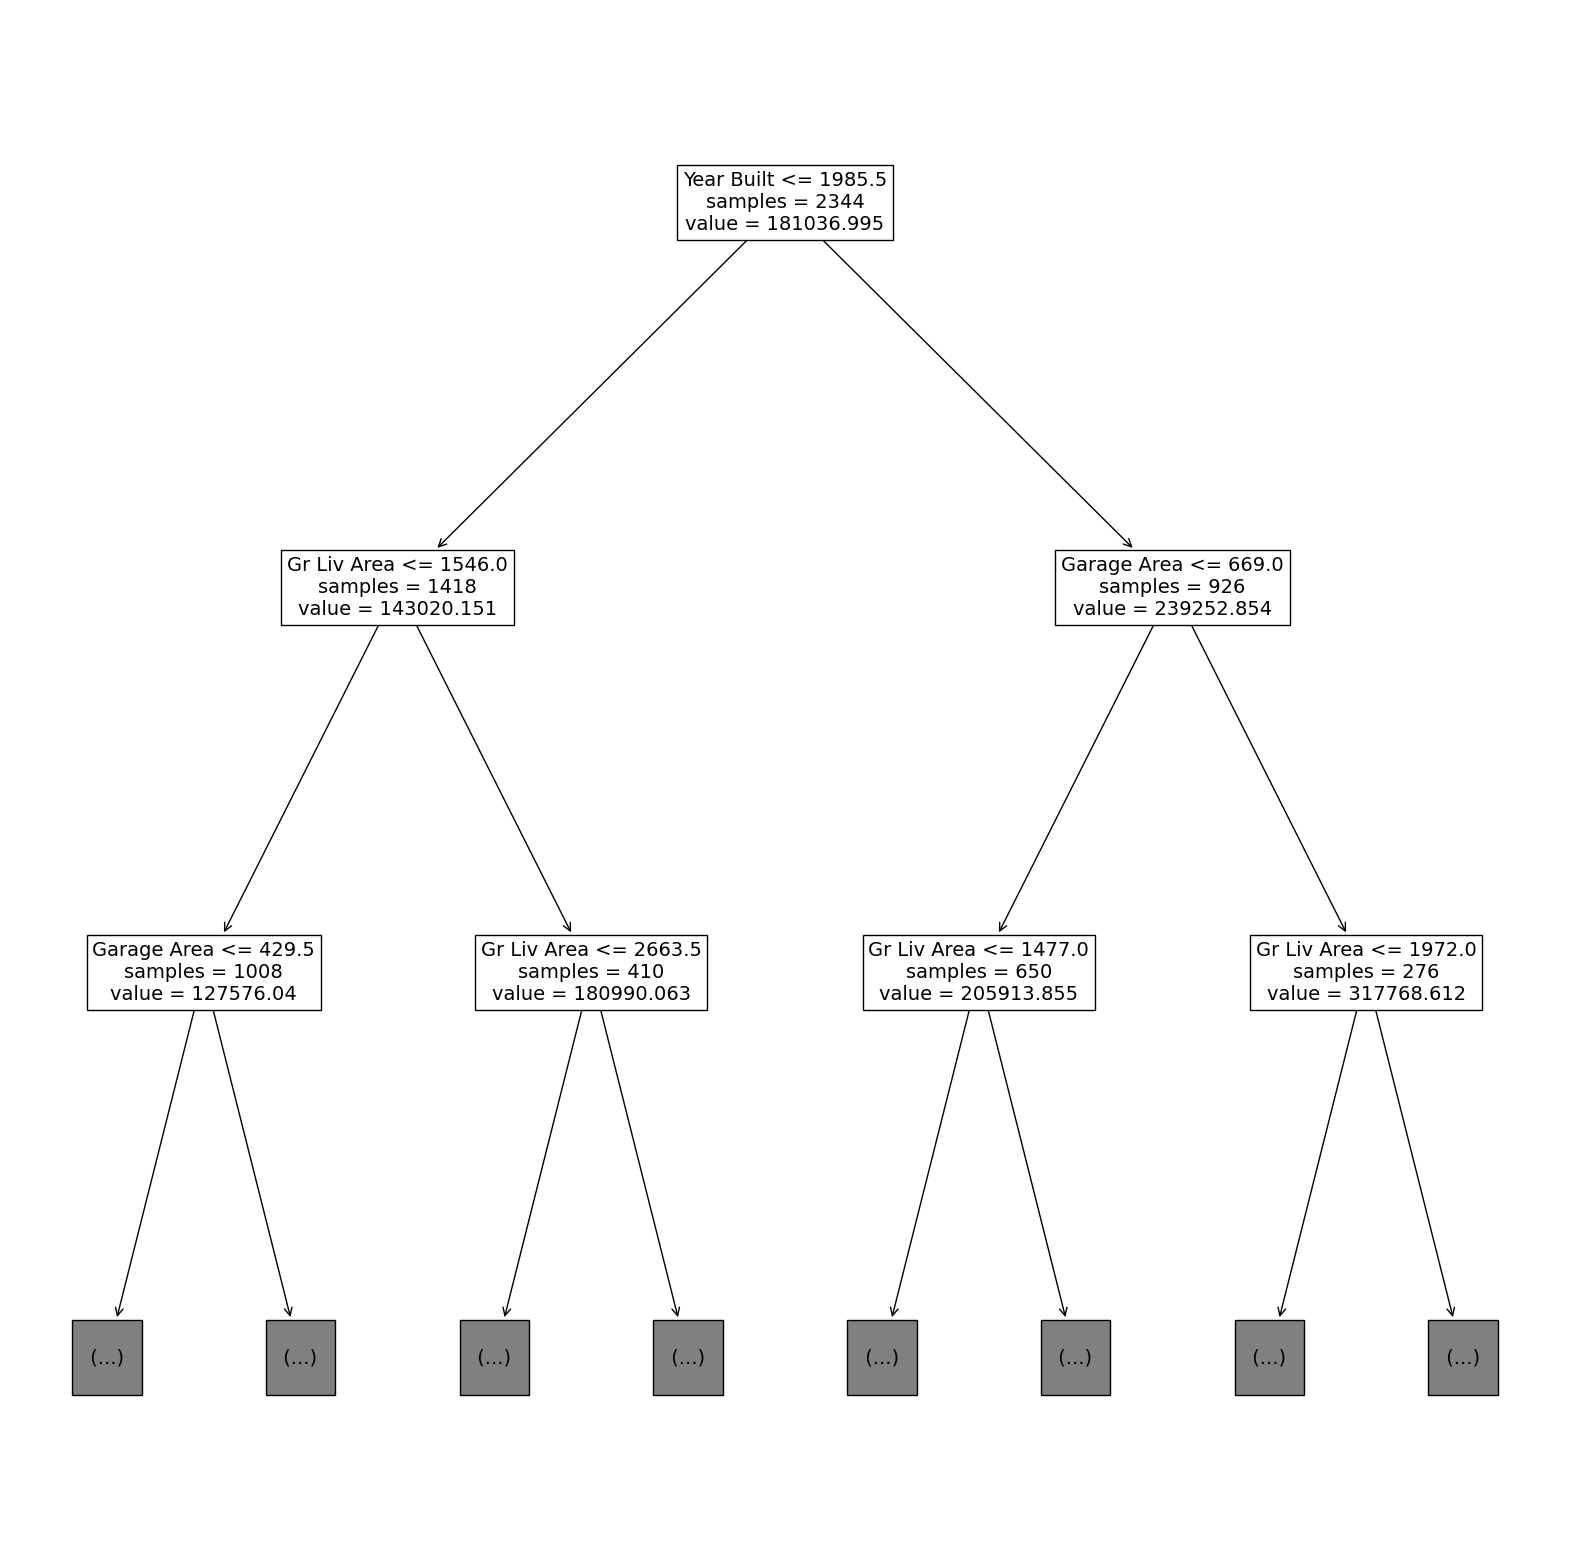

In [42]:
from sklearn import tree
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

# Let's take a look at how the tree looks like

figure(figsize=(20, 20))

tree.plot_tree(tree_reg, max_depth=2, feature_names=X_train.columns, 
               fontsize=14, label="all", impurity=False)
plt.show()

In [43]:
# We can now use the tree to predict values. 
# If we use to predict the train values we 
# can calculate our train error:
train_predicted = tree_reg.predict(X_train)

# As saw in the previous session, 
# our train error will be the MSE 
# between the logarithm of our prediction 
# and the logarithm of the Sale Price
print (mean_squared_error(np.log(y_train), 
                          np.log(train_predicted), 
                          squared = False))

0.012179008739872006


In [44]:
# Now we repeat the process with the test data:

test_df = pd.read_csv('Ames_test.csv')
test_df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
1,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
2,527358200,85,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,WD,Family,170000
3,527368020,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,216000
4,527425090,20,RL,70.0,10500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,ConLI,Normal,115000


In [45]:
# For the example codes, I will only use 
# 4 variables and the target price

test_df = test_df[['Gr Liv Area',
                   'Garage Area',
                   'Year Built',
                   'Garage Finish',
                   'SalePrice']]

In [46]:
# Careful! For the test set, we just APPLY the One Hote Encoder
# So we only use "transform", not "fit" and "transform".

categorical_features = ['Garage Finish']

feature_arr = ohe.transform(test_df[categorical_features]).toarray()
feature_labels = ohe.categories_

features = pd.DataFrame(feature_arr, columns=ohe.get_feature_names_out())
test_df = pd.concat([test_df, features], axis=1).drop(columns=categorical_features, 
                                                      axis=1)

test_df.head()

,Gr Liv Area,Garage Area,Year Built,SalePrice,Garage Finish_Fin,Garage Finish_RFn,Garage Finish_Unf,Garage Finish_nan
0,896,730.0,1961,105000,0.0,0.0,1.0,0.0
1,2110,522.0,1968,244000,1.0,0.0,0.0,0.0
2,1173,528.0,1974,170000,0.0,1.0,0.0,0.0
3,1674,663.0,2000,216000,0.0,1.0,0.0,0.0
4,864,0.0,1971,115000,0.0,0.0,0.0,1.0


In [47]:
# We keep the same set of variables

X_test= test_df.drop(columns=['SalePrice']).fillna(0)
y_test = test_df[['SalePrice']].copy()

In [48]:
# And use the same tree to predict, 
# this time the test set:
y_test['SalePrice_predicted'] = tree_reg.predict(X_test)

In [49]:
# Now we have, for the test set, 
# the real Sale Price and our prediction
# So calculating the error is easy:
y_test.head()

,SalePrice,SalePrice_predicted
0,105000,128500.0
1,244000,193500.0
2,170000,134000.0
3,216000,307000.0
4,115000,124000.0


In [50]:
# Again, some error metric: 
# the MSE of the logarithms:

print(mean_squared_error(np.log(y_test['SalePrice']), 
                         np.log(y_test['SalePrice_predicted']), 
                         squared = False))

0.2755270536671898
